In [8]:
import os

In [9]:
rock_dir = os.path.join('data/rps/rock')
paper_dir = os.path.join('data/rps/paper')
scissors_dir = os.path.join('data/rps/scissors')

In [10]:
print('Total training rock images: ', len(os.listdir(rock_dir)))
print('Total training paper images: ', len(os.listdir(paper_dir)))
print('Total training scissors images: ', len(os.listdir(scissors_dir)))

Total training rock images:  840
Total training paper images:  840
Total training scissors images:  840


In [11]:
rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

['rock01-039.png', 'rock04-010.png', 'rock05ck01-014.png', 'rock04-072.png', 'rock02-059.png', 'rock07-k03-022.png', 'rock06ck02-093.png', 'rock07-k03-046.png', 'rock04-103.png', 'rock04-043.png']
['paper05-023.png', 'paper07-094.png', 'paper05-030.png', 'paper02-085.png', 'paper05-087.png', 'paper07-063.png', 'paper06-025.png', 'paper03-061.png', 'paper04-099.png', 'paper04-108.png']
['scissors03-000.png', 'testscissors01-046.png', 'scissors04-053.png', 'testscissors02-006.png', 'scissors03-072.png', 'scissors01-042.png', 'scissors04-097.png', 'scissors03-103.png', 'testscissors01-050.png', 'scissors01-094.png']


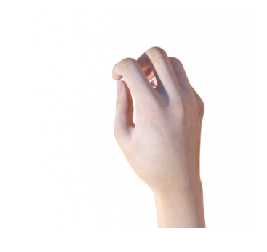

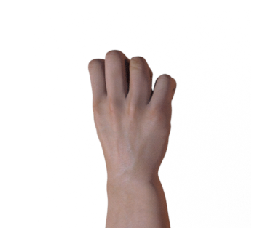

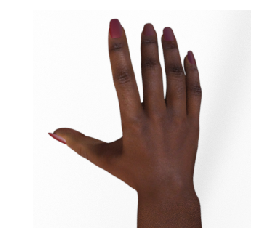

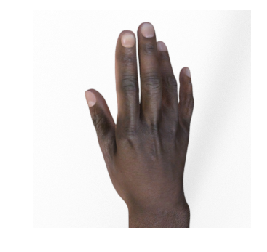

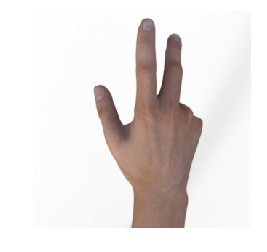

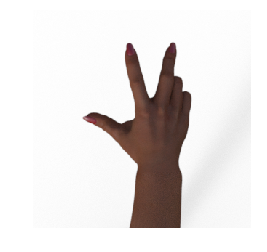

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [13]:
import tensorflow as tf
import keras_preprocessing 
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator 

In [14]:
TRAINING_DIR = "data/rps/"
training_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                     shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

In [15]:
VALIDATION_DIR = "data/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = training_datagen.flow_from_directory(TRAINING_DIR, target_size=(150,150), class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, target_size=(150,150), class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [19]:
model = tf.keras.models.Sequential([
    #1
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #4
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    #flatten
    tf.keras.layers.Flatten(),
    #dropout
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [21]:
history = model.fit_generator(train_generator, epochs=30, validation_data=validation_generator, verbose=1)
model.save("rps.h5")

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
79/79 [==============================] - 22s 277ms/step - loss: 1.1972 - acc: 0.3540 - val_loss: 1.1598 - val_acc: 0.3333
Epoch 2/30
79/79 [==============================] - 19s 245ms/step - loss: 0.9701 - acc: 0.5000 - val_loss: 0.6633 - val_acc: 0.6640
Epoch 3/30
79/79 [==============================] - 20s 248ms/step - loss: 0.6844 - acc: 0.6988 - val_loss: 0.2442 - val_acc: 0.9355
Epoch 4/30
79/79 [==============================] - 20s 249ms/step - loss: 0.4679 - acc: 0.8075 - val_loss: 0.1253 - val_acc: 0.9651
Epoch 5/30
79/79 [==============================] - 20s 247ms/step - loss: 0.3246 - acc: 0.8714 - val_loss: 0.0963 - val_acc: 0.9677
Epoch 6/30
79/79 [==============================] - 20s 254ms/step - loss: 0.2610 - acc: 0.9012 - val_loss: 0.2209 - val_acc: 0.8898
Epoch 7/30
79/79 [==============================] - 20s 252ms/step - loss: 0.1919 - acc: 0.9306 - val_loss: 0.1103 - val_acc: 0.9651
Epoch 8/30
79/79 [===

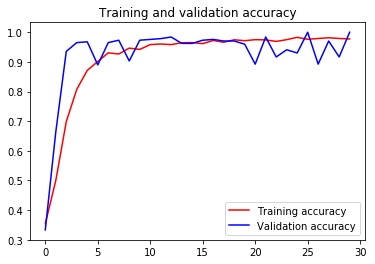

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

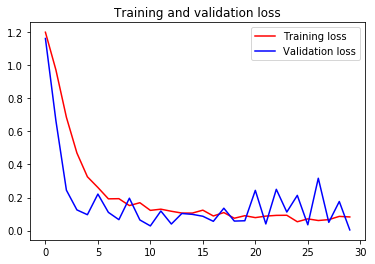

<Figure size 432x288 with 0 Axes>

In [23]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [30]:
from glob import glob

n = [i[9:-1].upper() for i in sorted(glob('data/rps/*/'))]
print(n)

['PAPER', 'ROCK', 'SCISSORS']


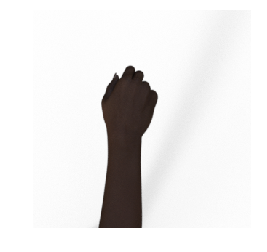

[[0. 1. 0.]]
ROCK


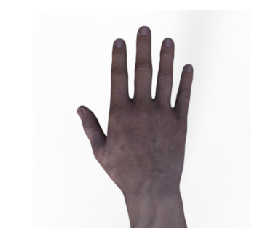

[[1. 0. 0.]]
PAPER


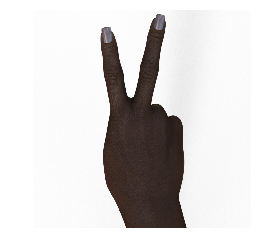

[[0. 0. 1.]]
SCISSORS


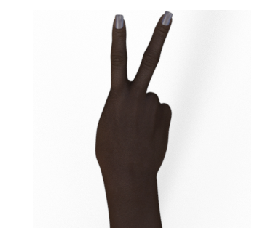

[[0. 0. 1.]]
SCISSORS


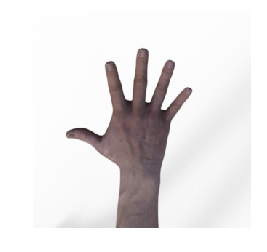

[[1. 0. 0.]]
PAPER


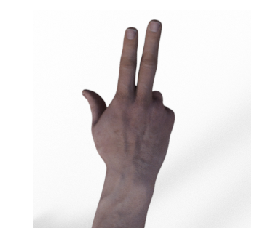

[[0. 0. 1.]]
SCISSORS


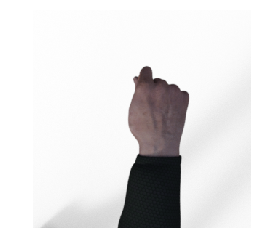

[[0. 1. 0.]]
ROCK


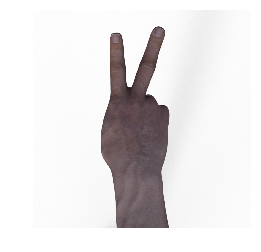

[[0. 0. 1.]]
SCISSORS


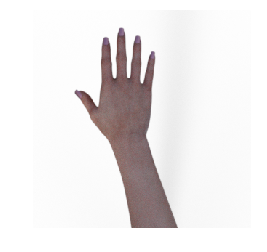

[[1. 0. 0.]]
PAPER


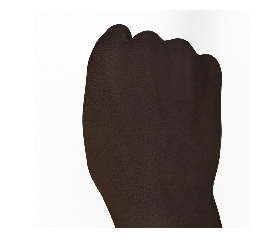

[[0. 1. 0.]]
ROCK


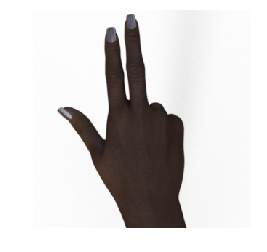

[[0. 0. 1.]]
SCISSORS


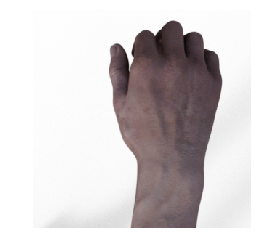

[[0. 1. 0.]]
ROCK


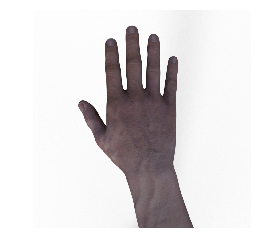

[[1. 0. 0.]]
PAPER


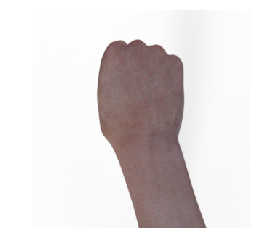

[[0. 1. 0.]]
ROCK


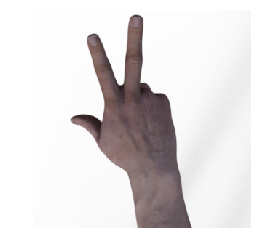

[[0. 0. 1.]]
SCISSORS


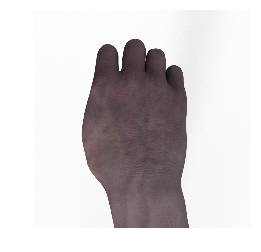

[[0. 1. 0.]]
ROCK


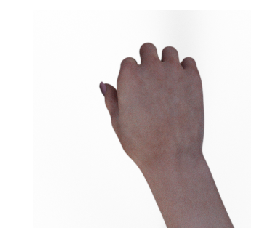

[[0. 1. 0.]]
ROCK


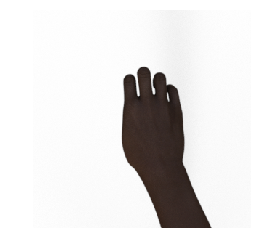

[[1. 0. 0.]]
PAPER


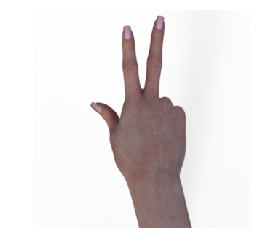

[[0. 0. 1.]]
SCISSORS


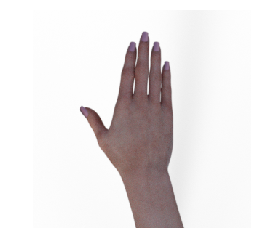

[[1. 0. 0.]]
PAPER


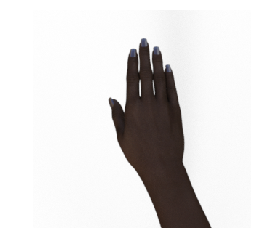

[[1. 0. 0.]]
PAPER


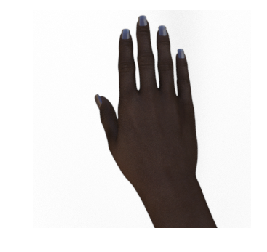

[[1. 0. 0.]]
PAPER


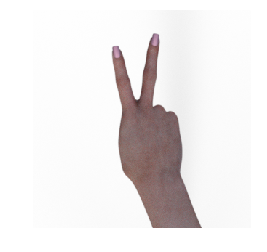

[[0. 0. 1.]]
SCISSORS


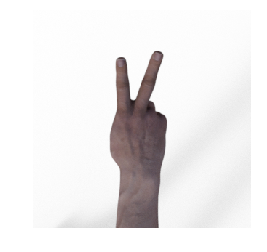

[[0. 0. 1.]]
SCISSORS


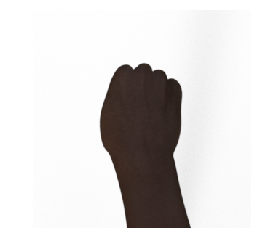

[[0. 1. 0.]]
ROCK


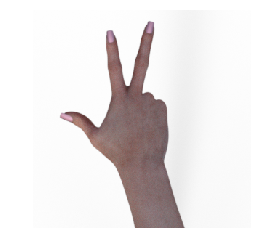

[[0. 0. 1.]]
SCISSORS


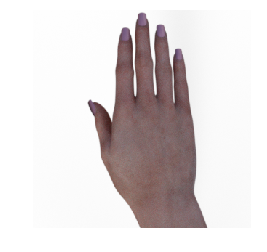

[[1. 0. 0.]]
PAPER


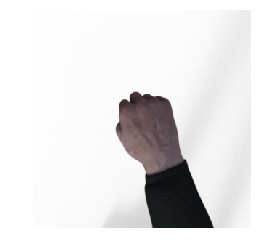

[[0. 1. 0.]]
ROCK


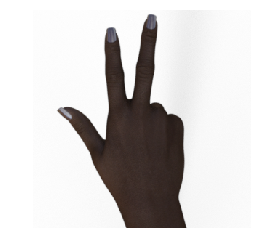

[[0. 0. 1.]]
SCISSORS


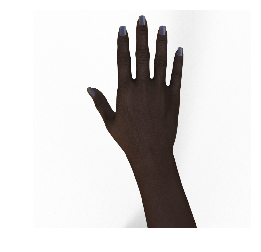

[[1. 0. 0.]]
PAPER


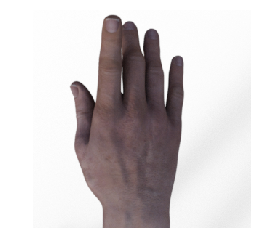

[[1. 0. 0.]]
PAPER


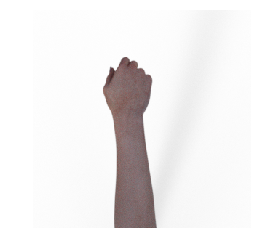

[[0. 1. 0.]]
ROCK


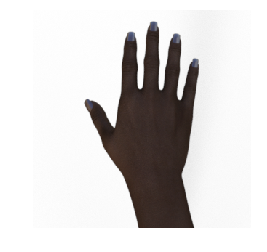

[[1. 0. 0.]]
PAPER


In [39]:
for i in glob('data/check/*'):
    img=mpimg.imread(i)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    img = image.load_img(i, target_size=(150,150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x)
    print(classes)
    print(n[np.argmax(classes)])